In [2]:
import pandas as pd

data = pd.read_csv("boston_housing.csv")

print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [4]:
data.head(15)
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


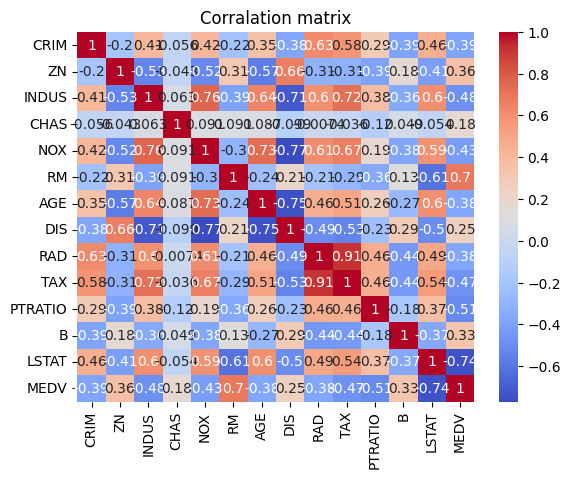

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Corralation matrix")
plt.show()

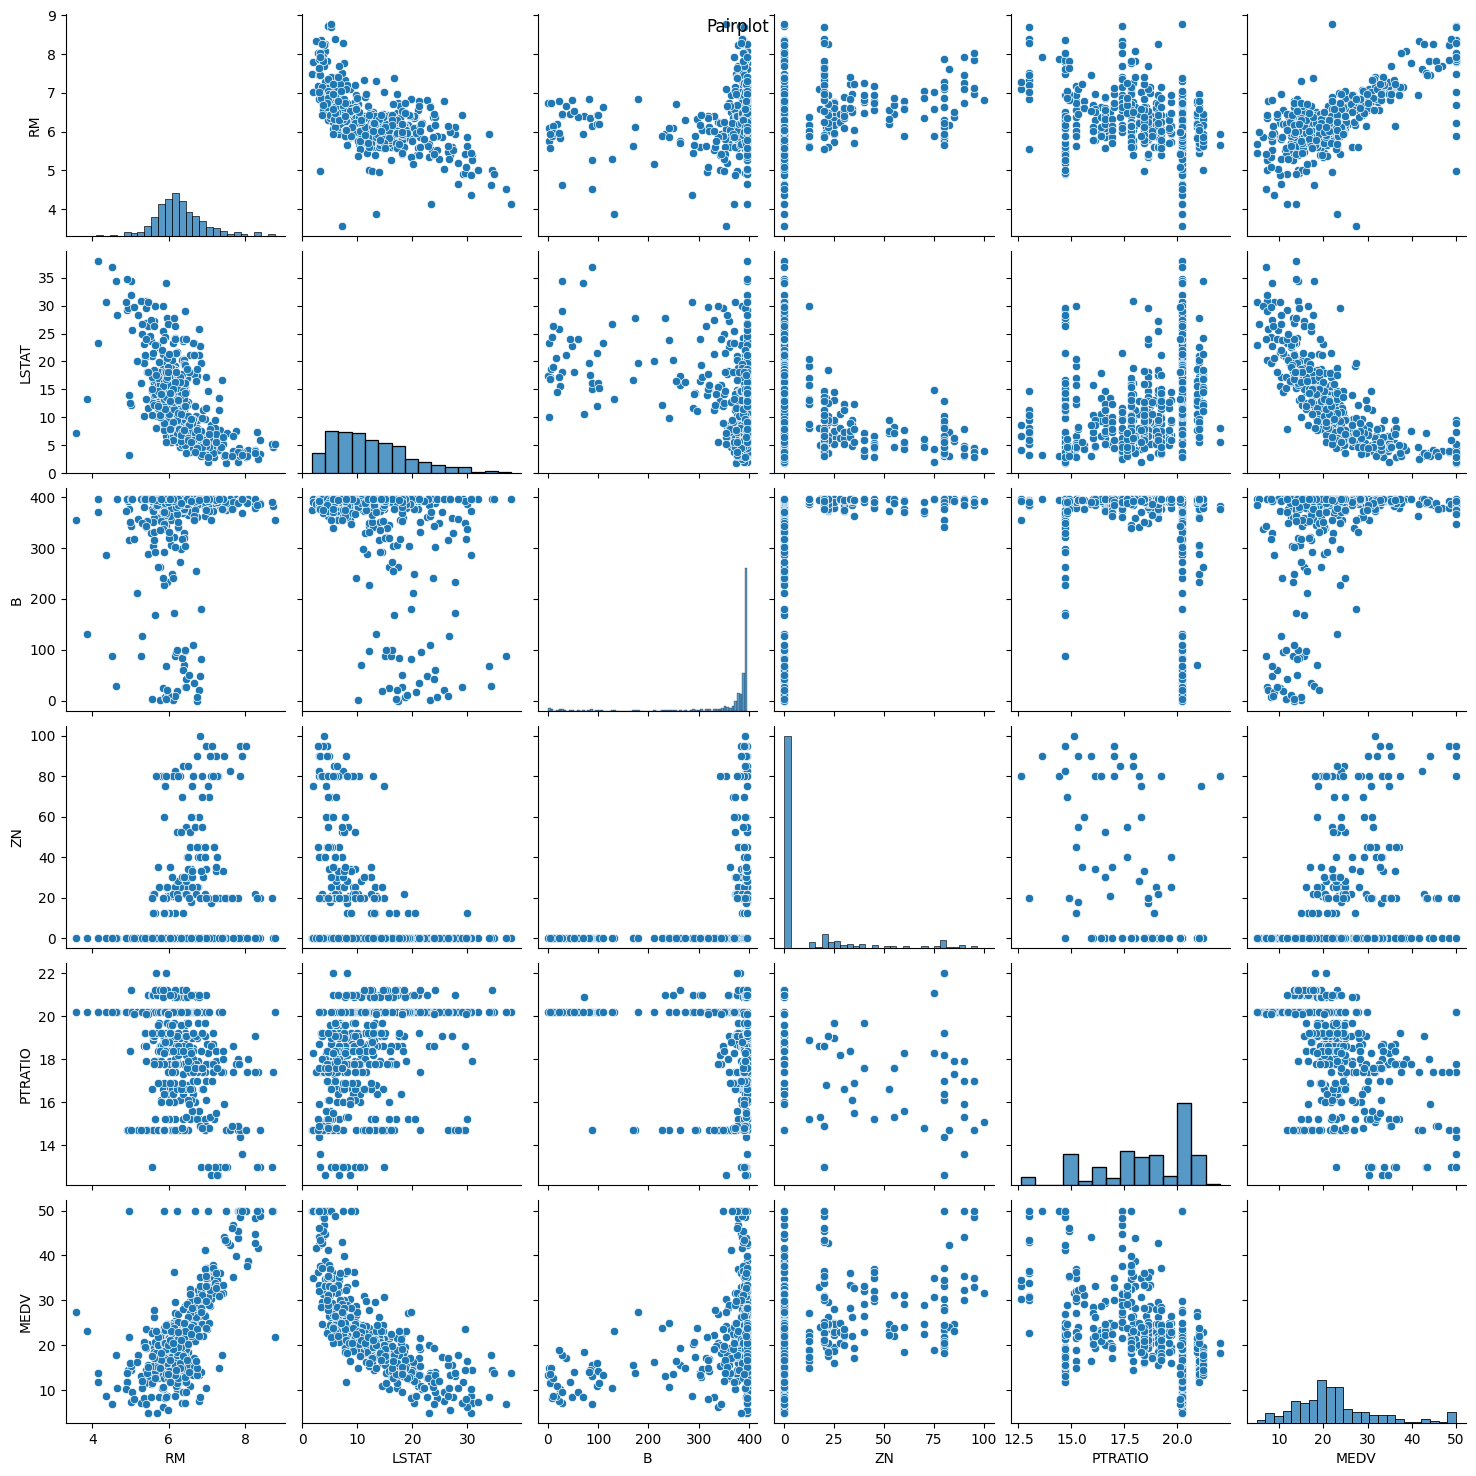

In [6]:
selected_features = ['RM', 'LSTAT', 'B', 'ZN', 'PTRATIO', 'MEDV']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot')
plt.show()

# Linear regression 6-dars

In [7]:
X = data[['RM']] # imput
y = data['MEDV'] # output

y.shape

(506,)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared error: {r2}")


(354, 1) (152, 1)
Mean squared error: 40.35144969787305
Mean absolute error: 4.314224104076755
R-squared error: 0.4584649934303068


# 7- Lesson

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

yuqoridagilarni visualizatsiya qilamiz bu darsda

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared error: {r2}")

(354, 1) (152, 1)
Mean squared error: 40.35144969787305
Mean absolute error: 4.314224104076755
R-squared error: 0.4584649934303068


y = b0 + b1 * x

In [10]:
print(model.coef_)
print(model.intercept_)

[9.1181022]
-34.662307438406785


In [14]:
out = -34.662307438406785 + 9.1181022 * 5.813
print(out)
out_model = model.predict([[5.813]])
print(out_model)

18.341220650193208
[18.34122063]


c:\Users\BOBOMUROT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


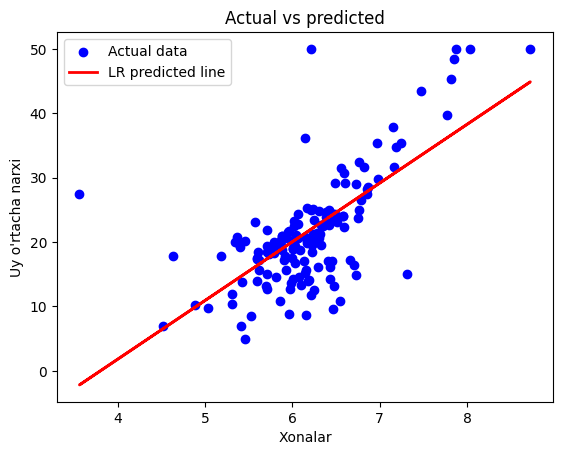

In [17]:
plt.scatter(x_test, y_test, color="blue", label="Actual data")
plt.plot(x_test, y_pred, color="red", linewidth=2, label='LR predicted line')
plt.title("Actual vs predicted")
plt.xlabel("Xonalar")
plt.ylabel("Uy o'rtacha narxi")
plt.legend()
plt.show()

# 8 - lesson

In [28]:
X = data[['RM', 'B']] # imput
# X = data.drop("MEDV", axis=1)
y = data['MEDV'] # output


model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"Mean absolute error: {mae}")
print(f"R-squared error: {r2}")

Mean squared error: 35.21142777350693
Mean absolute error: 3.9122738935537327
R-squared error: 0.5274464507861424


KeyError: 'ZN'

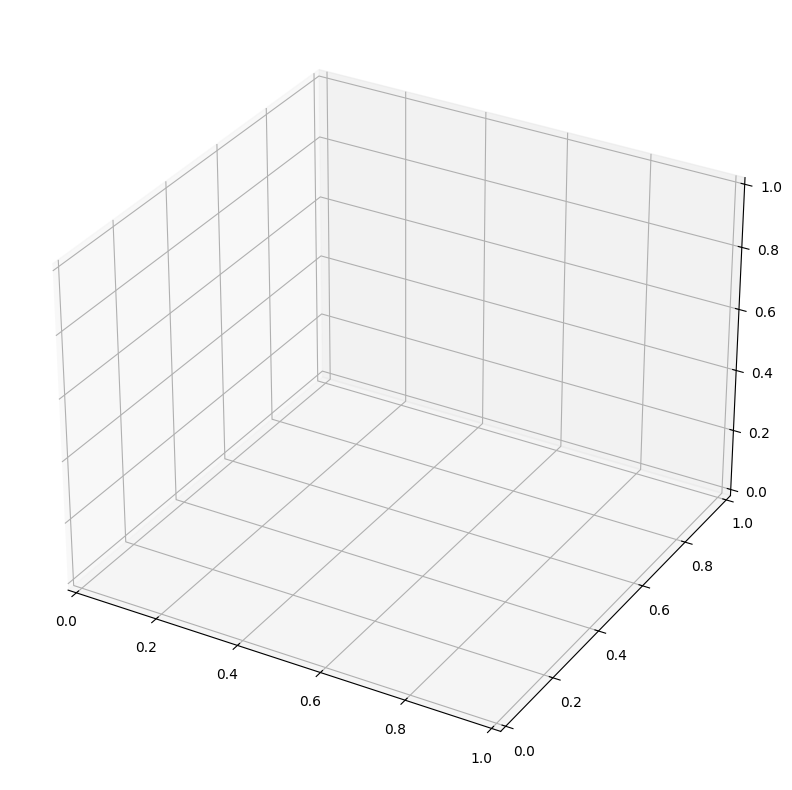

In [30]:
import numpy as np

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_test['RM'], x_test['ZN'], y_test, c='blue', marker='o', label='Actual data')

rm_range = np.linspace(x_test['RM'].min(), x_test['RM'].max(), 50)
zn_range = np.linspace(x_test['ZN'].min(), x_test['ZN'].max(), 50)
rm_range, zn_range = np.meshgrid(rm_range, zn_range)

medv_range = model.predict(pd.DataFrame({"RM": rm_range.flatten(), "ZN": zn_range.flatten()}))
medv_range = medv_range.reshape(rm_range.shape)

ax.plot_surface(rm_range, zn_range, medv_range, color='blue', alpha = 0.4, label = "Prediction regression surface")

ax.set_xlabel("RM")
ax.set_ylabel("ZN")
ax.set_zlabel("MEDV")

ax.set_title("3d plot")

plt.show()
